print()

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the input data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)  # Add the channel dimension
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the CNN model
model = keras.Sequential([
    # First Convolutional Layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Layer with 64 filters and a 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the 2D feature maps to a 1D array
    layers.Flatten(),
    
    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),
    
    # Add another dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),
    
    # Add the output layer with 10 units (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.00005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [2]:
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.4, verbose=2)



Epoch 1/10
1125/1125 - 18s - loss: 0.7133 - accuracy: 0.8192 - val_loss: 0.2465 - val_accuracy: 0.9288 - 18s/epoch - 16ms/step
Epoch 2/10
1125/1125 - 17s - loss: 0.2015 - accuracy: 0.9410 - val_loss: 0.1689 - val_accuracy: 0.9498 - 17s/epoch - 15ms/step
Epoch 3/10
1125/1125 - 16s - loss: 0.1449 - accuracy: 0.9571 - val_loss: 0.1299 - val_accuracy: 0.9617 - 16s/epoch - 14ms/step
Epoch 4/10
1125/1125 - 16s - loss: 0.1146 - accuracy: 0.9662 - val_loss: 0.1117 - val_accuracy: 0.9649 - 16s/epoch - 14ms/step
Epoch 5/10
1125/1125 - 16s - loss: 0.0980 - accuracy: 0.9711 - val_loss: 0.1002 - val_accuracy: 0.9694 - 16s/epoch - 14ms/step
Epoch 6/10
1125/1125 - 16s - loss: 0.0837 - accuracy: 0.9754 - val_loss: 0.0864 - val_accuracy: 0.9734 - 16s/epoch - 14ms/step
Epoch 7/10
1125/1125 - 16s - loss: 0.0751 - accuracy: 0.9777 - val_loss: 0.0845 - val_accuracy: 0.9741 - 16s/epoch - 14ms/step
Epoch 8/10
1125/1125 - 16s - loss: 0.0673 - accuracy: 0.9806 - val_loss: 0.0760 - val_accuracy: 0.9769 - 16s/ep

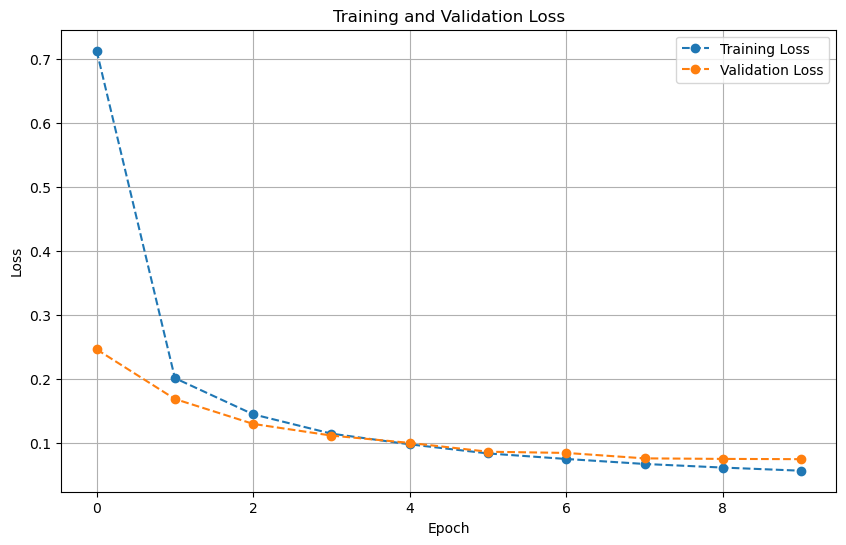

In [3]:

import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0641 - accuracy: 0.9798
Test Loss: 0.06409593671560287
Test Accuracy: 0.9797999858856201
